In [1]:
import os
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent   
sys.path.insert(0, str(PROJECT_ROOT))

import pandas as pd
import numpy as np


from src.data import read_xyz_trajectory, split_dataset, calculate_average_distances
from src.visualize import plot_molecule_frame, proton_transfer_coordinate_and_energy
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "../dataset/"

In [3]:
dataset = read_xyz_trajectory(os.path.join(DATA_DIR, "raw/malonaldehyde_300K/structures.xyz"), os.path.join(DATA_DIR, "raw/malonaldehyde_300K/energies.txt"))
dataset.head(15)

,frame,atom_index,element,atomic_number,x,y,z,energy
0,0,0,O,8,7.518784,12.374943,9.872595,-44957.131360
1,0,1,C,6,7.700793,10.111345,10.143338,-44957.131360
2,0,2,C,6,10.074552,8.697429,9.988165,-44957.131360
3,0,3,C,6,12.301752,9.908006,9.874942,-44957.131360
4,0,4,O,8,12.404117,12.447734,10.120959,-44957.131360
5,0,5,H,1,5.978652,8.981591,10.231535,-44957.131360
6,0,6,H,1,9.954607,6.692762,9.916954,-44957.131360
7,0,7,H,1,14.156946,8.958377,9.833734,-44957.131360
8,0,8,H,1,10.442674,12.790426,9.943805,-44957.131360
9,1,0,O,8,7.641590,12.480086,9.958507,-44958.579728


In [4]:
dataset.count()

frame            18000
atom_index       18000
element          18000
atomic_number    18000
x                18000
y                18000
z                18000
energy           18000
dtype: int64

In [5]:
train_dataset, val_dataset = split_dataset(dataset, val_size=0.1, random_state=42)
train_dataset.head(25)


,frame,atom_index,element,atomic_number,x,y,z,energy
0,0,0,O,8,7.518784,12.374943,9.872595,-44957.131360
1,0,1,C,6,7.700793,10.111345,10.143338,-44957.131360
2,0,2,C,6,10.074552,8.697429,9.988165,-44957.131360
3,0,3,C,6,12.301752,9.908006,9.874942,-44957.131360
4,0,4,O,8,12.404117,12.447734,10.120959,-44957.131360
5,0,5,H,1,5.978652,8.981591,10.231535,-44957.131360
6,0,6,H,1,9.954607,6.692762,9.916954,-44957.131360
7,0,7,H,1,14.156946,8.958377,9.833734,-44957.131360
8,0,8,H,1,10.442674,12.790426,9.943805,-44957.131360
9,1,0,O,8,7.641590,12.480086,9.958507,-44958.579728


In [6]:
val_dataset.head(25)

,frame,atom_index,element,atomic_number,x,y,z,energy
0,29,0,O,8,7.557565,12.291495,9.955178,-44954.280136
1,29,1,C,6,7.635495,10.091053,10.060762,-44954.280136
2,29,2,C,6,10.049188,8.760232,9.974217,-44954.280136
3,29,3,C,6,12.265592,9.979215,9.979064,-44954.280136
4,29,4,O,8,12.492157,12.417462,10.030778,-44954.280136
5,29,5,H,1,5.930452,8.842097,10.134908,-44954.280136
6,29,6,H,1,10.052017,6.671123,9.946727,-44954.280136
7,29,7,H,1,14.012525,8.899881,9.920688,-44954.280136
8,29,8,H,1,10.689253,12.939484,10.279800,-44954.280136
9,49,0,O,8,7.578864,12.366517,10.067788,-44957.894741


In [7]:
train_dataset.count()

frame            16200
atom_index       16200
element          16200
atomic_number    16200
x                16200
y                16200
z                16200
energy           16200
dtype: int64

In [8]:
val_dataset.count()

frame            1800
atom_index       1800
element          1800
atomic_number    1800
x                1800
y                1800
z                1800
energy           1800
dtype: int64

#### EDA

In [9]:
train_dataset.shape

(16200, 8)

In [10]:
train_dataset.dtypes

frame              int64
atom_index         int64
element           object
atomic_number      int64
x                float64
y                float64
z                float64
energy           float64
dtype: object

In [11]:
train_dataset.isna().sum()

frame            0
atom_index       0
element          0
atomic_number    0
x                0
y                0
z                0
energy           0
dtype: int64

In [12]:
train_dataset.describe()

,frame,atom_index,atomic_number,x,y,z,energy
count,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000,16200.000000
mean,996.356111,4.000000,4.222222,9.999355,10.108853,10.000970,-44953.982464
std,578.178617,2.582069,2.973222,2.506490,1.952953,0.199188,3.546621
min,0.000000,0.000000,1.000000,5.619141,6.493508,8.612501,-44961.645867
25%,495.750000,2.000000,1.000000,7.649608,8.816977,9.917692,-44956.393865
50%,998.500000,4.000000,6.000000,9.999796,9.940439,10.000539,-44954.527769
75%,1494.250000,6.000000,6.000000,12.351546,12.366895,10.082070,-44952.053084
max,1999.000000,8.000000,8.000000,14.394796,13.537416,11.301125,-44928.723831


<Axes3DSubplot:title={'center':'Malonaldehyde — Frame 0'}, xlabel='x (Å)', ylabel='y (Å)'>

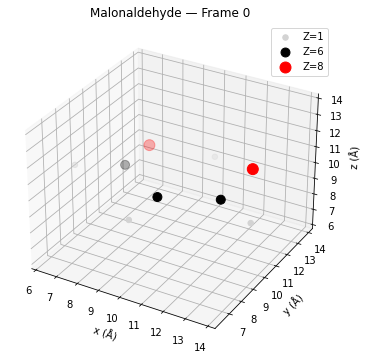

In [13]:
plot_molecule_frame(train_dataset, frame=0)

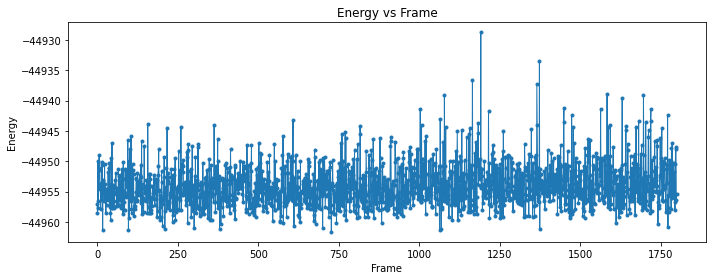

In [14]:
energy_per_frame = train_dataset.groupby("frame")["energy"].first()

plt.figure(figsize=(10,4))
plt.plot(energy_per_frame.values, marker=".", linewidth=1)
plt.xlabel("Frame")
plt.ylabel("Energy")
plt.title("Energy vs Frame")
plt.tight_layout()
plt.show()


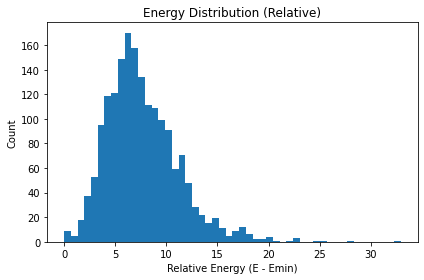

In [15]:
E = train_dataset.groupby("frame")["energy"].first().values
E_rel = E - E.min()

plt.figure(figsize=(6,4))
plt.hist(E_rel, bins=50)
plt.xlabel("Relative Energy (E - Emin)")
plt.ylabel("Count")
plt.title("Energy Distribution (Relative)")
plt.tight_layout()
plt.show()


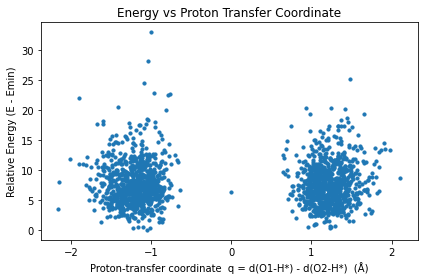

In [16]:
q, E = proton_transfer_coordinate_and_energy(train_dataset)
E_rel = E - E.min()

plt.figure(figsize=(6,4))
plt.scatter(q, E_rel, s=10)
plt.xlabel("Proton-transfer coordinate  q = d(O1-H*) - d(O2-H*)  (Å)")
plt.ylabel("Relative Energy (E - Emin)")
plt.title("Energy vs Proton Transfer Coordinate")
plt.tight_layout()
plt.show()


In [17]:
train_dataset.head(10)

,frame,atom_index,element,atomic_number,x,y,z,energy
0,0,0,O,8,7.518784,12.374943,9.872595,-44957.131360
1,0,1,C,6,7.700793,10.111345,10.143338,-44957.131360
2,0,2,C,6,10.074552,8.697429,9.988165,-44957.131360
3,0,3,C,6,12.301752,9.908006,9.874942,-44957.131360
4,0,4,O,8,12.404117,12.447734,10.120959,-44957.131360
5,0,5,H,1,5.978652,8.981591,10.231535,-44957.131360
6,0,6,H,1,9.954607,6.692762,9.916954,-44957.131360
7,0,7,H,1,14.156946,8.958377,9.833734,-44957.131360
8,0,8,H,1,10.442674,12.790426,9.943805,-44957.131360
9,1,0,O,8,7.641590,12.480086,9.958507,-44958.579728


In [ ]:
average_atom_to_atom_distances = calculate_average_distances(train_dataset)

In [19]:
print(average_atom_to_atom_distances.max())
print(average_atom_to_atom_distances.min())
print(average_atom_to_atom_distances)

8.184560245346146
0.0
[[0.         2.38969873 4.37400371 5.33184323 4.88218812 3.86047516
  6.17488738 7.39022304 2.50377298]
 [2.38969873 0.         2.64917131 4.67050128 5.33382634 2.08303519
  4.04055466 6.51795469 3.75366632]
 [4.37400371 2.64917131 0.         2.65048979 4.37646335 4.10353718
  2.05245591 4.10203328 4.17010923]
 [5.33184323 4.67050128 2.65048979 0.         2.39114411 6.52047305
  4.04004367 2.08177129 3.75754789]
 [4.88218812 5.33382634 4.37646335 2.39114411 0.         7.39382965
  6.17628055 3.86166062 2.51072501]
 [3.86047516 2.08303519 4.10353718 6.52047305 7.39382965 0.
  4.65793642 8.18456025 5.72257292]
 [6.17488738 4.04055466 2.05245591 4.04004367 6.17628055 4.65793642
  0.         4.65355065 6.20864646]
 [7.39022304 6.51795469 4.10203328 2.08177129 3.86166062 8.18456025
  4.65355065 0.         5.72596249]
 [2.50377298 3.75366632 4.17010923 3.75754789 2.51072501 5.72257292
  6.20864646 5.72596249 0.        ]]
